# ニューラルネットワークの理論



| 層 | 説明 |
| :-- | :-- |
| **入力層** | 生の入力データに相当する層 |
| **出力層** | モデルの最終的な出力に相当する層 |
| **隠れ層** | 入力層と出力層の間の中間データに相当する層。隠れ層が多く、各層のニューロンが多いほど複雑なモデルを表現できる |

各ニューロンは、1つ前の層の全ての出力+バイアス項

$$
a_i^{(l)} \equiv \displaystyle \sum_k W_{ik}^{(l)} x_k^{(l)} + b_i^{(l)}
$$

を総入力として、これに活性化関数を適用した値

$$
x_i^{(l+1)} = \phi^{(l)} \left( a_i^{(l)} \right) = \phi^{(l)} \left( \displaystyle \sum_k W_{ik}^{(l)} x_k^{(l)} + b_i^{(l)} \right)
$$

を出力とする。

行列・ベクトルを用いて以下のようにも書ける。

$$
\boldsymbol{a}^{(l)} \equiv W^{(l)} \boldsymbol{x}^{(l)} + \boldsymbol{b}^{(l)}
$$

$$
\boldsymbol{x}^{(l+1)} = \phi^{(l)} \left( \boldsymbol{a}^{(l)} \right) = \phi^{(l)} \left( W^{(l)} \boldsymbol{x}^{(l)} + \boldsymbol{b}^{(l)} \right)
$$

ただし、

$$
W^{(l)} = \begin{pmatrix}
w_{11}^{(l)} & \cdots & w_{1m}^{(l)} \\
\vdots &  & \vdots \\
w_{t1}^{(l)} & \cdots & w_{tm}^{(l)}
\end{pmatrix}
$$

$$
\boldsymbol{b}^{(l)} = \begin{pmatrix}
b_1^{(l)} \\
\vdots \\
b_t^{(l)}  \\
\end{pmatrix}
$$

$$
\boldsymbol{x}^{(l)} = \begin{pmatrix}
x_1^{(l)} \\
\vdots \\
x_m^{(l)}  \\
\end{pmatrix}
$$

$$
\boldsymbol{x}^{(l+1)} = \begin{pmatrix}
x_1^{(l+1)} \\
\vdots \\
x_t^{(l+1)}  \\
\end{pmatrix}
$$

パラメータを学習する。




## 順伝播による出力計算

第 $$l$$ 層の出力を用いて第 $$l+1$$ 層の出力を計算する。

$$
W^{(l)} = \begin{pmatrix}
w_{11}^{(l)} & \cdots & w_{1m}^{(l)} \\
\vdots &  & \vdots \\
w_{t1}^{(l)} & \cdots & w_{tm}^{(l)}
\end{pmatrix}
$$

$$
\boldsymbol{b}^{(l)} = \begin{pmatrix}
b_1^{(l)} \\
\vdots \\
b_t^{(l)}  \\
\end{pmatrix}
$$

$$
\boldsymbol{x}^{(l)} = \begin{pmatrix}
x_1^{(l)} \\
\vdots \\
x_m^{(l)}  \\
\end{pmatrix}
$$

$$
\boldsymbol{a}^{(l)} \equiv W^{(l)} \boldsymbol{x}^{(l)} + \boldsymbol{b}^{(l)}
$$

$$
\boldsymbol{x}^{(l+1)} = \phi^{(l)} \left( \boldsymbol{a}^{(l)} \right) = \phi^{(l)} \left( W^{(l)} \boldsymbol{x}^{(l)} + \boldsymbol{b}^{(l)} \right)
$$

## 誤差逆伝播による重み更新

ネットワークを構成する層の1つ（第 $$l+1$$ 層）について考える。

説明の一般化のため、層の出力 $$\boldsymbol{x}^{(l+1)} = \left(x_1^{(l+1)}, \cdots, x_t^{(l+1)}\right)$$ を計算するために必要な

- 1つ前の層の出力
- 重み・バイアス等のパラメータ

を全てひっくるめて $$\boldsymbol{v}$$ で表す：

$$\boldsymbol{v} = (v_1, \cdots, v_n) \equiv \left(\boldsymbol{x}^{(l)}, W^{(l)}, \boldsymbol{b}^{(l)}, \cdots\right)$$

$$\boldsymbol{x}^{(l+1)}$$ は $$\boldsymbol{v}$$ から計算されるので、$$\boldsymbol{x}^{(l+1)}$$ は $$\boldsymbol{v}$$ のみの関数として表現できる：

$$\boldsymbol{x}^{(l+1)} = \boldsymbol{x}^{(l+1)}(v_1, \cdots, v_n)$$

よって、コスト関数 $$J$$ の勾配の $$\boldsymbol{v}$$ 成分（= $$J$$ の $$\boldsymbol{v}$$ 微分）は、$$J$$ の $$\boldsymbol{x}^{(l+1)}$$ 微分で記述できる。

$$
\cfrac{\partial J}{\partial v_i}
= \cfrac{\partial J\left( x_1^{(l+1)}(\boldsymbol{v}),\cdots,x_t^{(l+1)}(\boldsymbol{v}) \right)}{\partial v_i}
= \displaystyle \sum_k \cfrac{\partial J}{\partial x_k^{(l+1)}} \cfrac{\partial x_k^{(l+1)}}{\partial v_i}
$$

ここで、
- $$\cfrac{\partial x_k^{(l+1)}}{\partial v_i}$$ はこの層で行う処理から解析的に計算できる
- $$\cfrac{\partial J}{\partial x_k^{(l+1)}}$$ は1つ後ろの層の入力による微分

したがって、**1つ後ろの層の微分が分かれば前の層の微分が全て計算できる**。

コスト関数 $$J$$ は最終層（出力層）の出力値のみから計算する関数であるから、最終層の変数による $$J$$ の微分は計算で求められる。


### 全結合層

#### 入力変数

| 変数 | 説明 |
| :-- | :-- |
| $$\boldsymbol{x}$$ | 前層の出力 |
| $$W$$ | $$\boldsymbol{x}$$ に付加する重み |
| $$\boldsymbol{b}$$ | バイアス項 |

#### 出力変数

$$
z_i = \displaystyle \sum_k W_{ik} x_k + b_i
$$

$$
\boldsymbol{z} = W \boldsymbol{x} + \boldsymbol{b}
$$

#### 勾配の導出

$$
\cfrac{\partial z_i}{\partial x_j} = W_{ij},
\cfrac{\partial z_i}{\partial b_i} = 1,
\cfrac{\partial z_i}{\partial W_{jk}} = \begin{cases}
x_k & \rm{\quad if \quad} i = j \\
0 & \rm{\quad if \quad} i \neq j
\end{cases}
$$

より、

$$
\cfrac{\partial J}{\partial x_i} = \displaystyle \sum_k \cfrac{\partial J}{\partial z_k} \cfrac{\partial z_k}{\partial x_i}
= \displaystyle \sum_k \cfrac{\partial J}{\partial z_k} W_{ki}
= \displaystyle \sum_k W_{ik}^T \cfrac{\partial J}{\partial z_k}
= \left( W^T \cfrac{\partial J}{\partial \boldsymbol{z}} \right)_i
$$

$$
\cfrac{\partial J}{\partial W_{ij}} = \displaystyle \sum_k \cfrac{\partial J}{\partial z_k} \cfrac{\partial z_k}{\partial W_{ij}}
= \cfrac{\partial J}{\partial z_i} \cfrac{\partial z_i}{\partial W_{ij}}
= \cfrac{\partial J}{\partial z_i} x_j
= \left( \cfrac{\partial J}{\partial \boldsymbol{z}} \boldsymbol{x}^T \right)_{ij}
$$

$$
\cfrac{\partial J}{\partial b_i} = \displaystyle \sum_k \cfrac{\partial J}{\partial z_k} \cfrac{\partial z_k}{\partial b_i}
= \cfrac{\partial J}{\partial z_i} \cfrac{\partial z_i}{\partial b_i}
= \cfrac{\partial J}{\partial z_i}
$$


### 活性化層

#### 入力変数

| 変数 | 説明 |
| :-- | :-- |
| $$\boldsymbol{x}$$ | 前層の出力 |

#### 出力変数

$$
\boldsymbol{z} = \phi \left( \boldsymbol{x} \right)
$$

#### 勾配の導出

$$
\cfrac{\partial J}{\partial x_i} = \displaystyle \sum_k \cfrac{\partial J}{\partial z_k} \cfrac{\partial z_k}{\partial x_i}
= \displaystyle \sum_k \cfrac{\partial J}{\partial z_k} \cfrac{\partial \phi \left( \boldsymbol{x} \right)_k}{\partial x_i}
$$


### SoftMax 層

#### 入力変数

| 変数 | 説明 |
| :-- | :-- |
| $$\boldsymbol{x}$$ | 前層の出力 |

#### 出力変数

$$
z_i = \cfrac{e^{x_i}}{\sum_k e^{x_k}}
$$

#### 勾配の導出

$$
\cfrac{\partial J}{\partial x_i} = \displaystyle \sum_k \cfrac{\partial J}{\partial z_k} \cfrac{\partial z_k}{\partial x_i}
= \displaystyle \sum_k \cfrac{\partial J}{\partial z_k}
\cfrac{
    \frac{\partial e^{x_k}}{\partial x_i} \sum_l e^{x_l}
    - \frac{\partial \left(\sum_l e^{x_l}\right)}{\partial x_i} e^{x_k}
}
{ \left(\sum_l e^{x_l}\right)^2 }
= \displaystyle \sum_k \cfrac{\partial J}{\partial z_k}
\cfrac{
    \delta_{ki} e^{x_i} \sum_l e^{x_l}
    - e^{x_i} e^{x_k}
}
{ \left(\sum_l e^{x_l}\right)^2 }
= \displaystyle \sum_k \cfrac{\partial J}{\partial z_k} \left(
\delta_{ki} z_i - z_i z_k
\right)
= z_i \left( \cfrac{\partial J}{\partial z_i} - \sum_k \cfrac{\partial J}{\partial z_k} z_k \right)
$$

### コスト関数計算（分類問題において対数尤度を用いる場合）

#### 入力変数

| 変数 | 説明 |
| :-- | :-- |
| $$\hat{\boldsymbol{y}}^{(k)}$$ | 前層の出力のうち、ミニバッチの $$k$$ 番目のサンプル。<br>ソフトマックス層などで計算された、サンプルが各ラベルへ所属する確率のベクトル |
| $$\boldsymbol{y}$$ | 正解クラスラベルを表す確率のベクトル。正解クラスに対応する成分のみ1、他成分は0 |

#### 出力変数

出力はコスト関数 $$J$$。

ロジスティック回帰と同様に、与えられた教師データが実現する尤度（対数尤度）を最大化する場合を考える。  
このとき、コスト関数 $$J$$ は対数尤度にマイナスをかけたものとなる：

$$
J =
- \displaystyle \sum_i \sum_j \left\{
y_j^{(i)} \log{\hat{y}_j^{(i)}}
+ \left(1-y_j^{(i)}\right) \log{\left(1-\hat{y}_j^{(i)}\right)}
\right\}
$$


#### 勾配の導出

$$
\begin{eqnarray}
\cfrac{\partial J}{\partial \hat{y_j^{(i)}}}
&=& - \left( \cfrac{y_j^{(i)}}{\hat{y_j^{(i)}}} - \cfrac{1-y_j^{(i)}}{1-\hat{y_j^{(i)}}} \right)
\\
&=& \cfrac{\hat{y_j^{(i)}} - y_j^{(i)}}{\hat{y_j^{(i)}} \left(1-\hat{y_j^{(i)}}\right) }
\end{eqnarray}
$$


### Batch Normalization

#### 入力変数

| 変数 | 説明 |
| :-- | :-- |
| $$\boldsymbol{x}^{(k)}$$ | 前層の出力のうち、ミニバッチの $$k$$ 番目のサンプル |
| $$\boldsymbol{\gamma}$$ | $$\boldsymbol{x}^{(k)}$$ と同じ次元の調整用変数（重み） |
| $$\boldsymbol{\beta}$$ | $$\boldsymbol{x}^{(k)}$$ と同じ次元の調整用変数（バイアス） |
| $$N$$ | ミニバッチのサイズ（サンプル数）→ 定数 |

#### 中間変数

| 変数 | 説明 |
| :-- | :-- |
| $$\boldsymbol{\mu}$$ | $$\boldsymbol{x}$$ のミニバッチ内平均 |
| $$\boldsymbol{\sigma}$$ | $$\boldsymbol{x}$$ のミニバッチ内標準偏差 |
| $$\hat{\boldsymbol{x}}^{(k)}$$ | $$\boldsymbol{x}^{(k)}$$ をミニバッチ内で標準化したもの |

$$
\boldsymbol{\mu} \equiv \cfrac{1}{N} \displaystyle \sum_k \boldsymbol{x}^{(k)}
$$

$$
\boldsymbol{\sigma}^2 \equiv \cfrac{1}{N} \displaystyle \sum_k \left( \boldsymbol{x}^{(k)} - \boldsymbol{\mu} \right)^2
$$

$$
\hat{\boldsymbol{x}}^{(k)} \equiv \cfrac{\boldsymbol{x}^{(k)} - \boldsymbol{\mu}}{\sqrt{\boldsymbol{\sigma}^2 + \varepsilon}}
$$

#### 出力変数

$$
\boldsymbol{z}^{(k)} = \boldsymbol{\gamma} \odot \hat{\boldsymbol{x}}^{(k)} + \boldsymbol{\beta}
$$

$$\odot$$ は同じ成分同士の積を取る演算（アダマール積）


#### 勾配の導出

$$
\cfrac{\partial \mu_i}{\partial x_i^{(j)}} = \cfrac{1}{N}
$$

$$
\cfrac{\partial \sigma_i^2}{\partial x_i^{(j)}} = \cfrac{2}{N} \left( x_i^{(j)} - \mu_i \right)
$$

より、

$$
\cfrac{\partial J}{\partial \gamma_i} = \displaystyle \sum_k \cfrac{\partial J}{\partial z_i^{(k)}} \cfrac{\partial z_i^{(k)}}{\partial \gamma_i}
= \displaystyle \sum_k \cfrac{\partial J}{\partial z_i^{(k)}} \hat{x}_i^{(k)}
$$

$$
\cfrac{\partial J}{\partial \beta_i} = \displaystyle \sum_k \cfrac{\partial J}{\partial z_i^{(k)}} \cfrac{\partial z_i^{(k)}}{\partial \beta_i}
= \displaystyle \sum_k \cfrac{\partial J}{\partial z_i^{(k)}}
$$

$$
\begin{eqnarray}
\cfrac{\partial J}{\partial x_i^{(j)}} &=& \displaystyle \sum_k \cfrac{\partial J}{\partial z_i^{(k)}} \cfrac{\partial z_i^{(k)}}{\partial x_i^{(j)}}
= \displaystyle \sum_k \cfrac{\partial J}{\partial z_i^{(k)}} \cfrac{\partial z_i^{(k)} \left( x_i, \mu_i(x_i), \sigma_i^2(x_i) \right) }{\partial x_i^{(j)}}
\\
&=& \displaystyle \sum_k \cfrac{\partial J}{\partial z_i^{(k)}} \gamma_i
\left(
\cfrac{1}{\sqrt{\sigma_i^2 + \varepsilon}} \delta_{jk}
- \cfrac{\partial \mu_i}{\partial x_i^{(j)}} \cfrac{1}{\sqrt{\sigma_i^2 + \varepsilon}}
- \cfrac{\partial \sigma_i^2}{\partial x_i^{(j)}} \cfrac{x_i^{(k)} - \mu_i}{2 \left( \sqrt{\sigma_i^2 + \varepsilon} \right)^3}
\right) \\
&=& \displaystyle \sum_k \cfrac{\partial J}{\partial z_i^{(k)}} \gamma_i
\left(
\cfrac{1}{\sqrt{\sigma_i^2 + \varepsilon}} \delta_{jk}
- \cfrac{1}{N} \cfrac{1}{\sqrt{\sigma_i^2 + \varepsilon}}
- \cfrac{1}{N} \left( x_i^{(j)} - \mu_i \right) \cfrac{x_i^{(k)} - \mu_i}{\left( \sqrt{\sigma_i^2 + \varepsilon} \right)^3}
\right) \\
&=& \cfrac{\gamma_i}{N \sqrt{\sigma_i^2 + \varepsilon}}
\left(
N \cfrac{\partial J}{\partial z_i^{(j)}}
- \displaystyle \sum_k \cfrac{\partial J}{\partial z_i^{(k)}}
- \hat{x}_i^{(j)} \displaystyle \sum_k \cfrac{\partial J}{\partial z_i^{(k)}} \hat{x}_i^{(k)}
\right) \\
&=& \cfrac{\gamma_i}{N \sqrt{\sigma_i^2 + \varepsilon}}
\left(
N \cfrac{\partial J}{\partial z_i^{(j)}}
- \displaystyle \cfrac{\partial J}{\partial \beta_i}
- \hat{x}_i^{(j)} \cfrac{\partial J}{\partial \gamma_i}
\right) \\
&=& \left\{ \cfrac{1}{N} \cfrac{\boldsymbol{\gamma}}{\sqrt{\boldsymbol{\sigma}^2 + \varepsilon}} \odot
\left(
N \cfrac{\partial J}{\partial \boldsymbol{z}^{(j)}}
- \displaystyle \cfrac{\partial J}{\partial \boldsymbol{\beta}}
- \hat{\boldsymbol{x}}^{(j)} \odot \cfrac{\partial J}{\partial \boldsymbol{\gamma}}
\right) \right\}_i \\
\end{eqnarray}
$$

# 実装・動作確認（多クラス分類）

MLP の最終出力 $$\boldsymbol{y} = (y_1, \cdots, y_n)$$ を各クラスへの所属確率とする、$$n$$ クラス分類器を作る。

## 準備

ロジスティック回帰と同様に、与えられた教師データが実現する尤度（対数尤度）を最大化する。  
この場合、最小化すべきコスト関数 $$J$$ は対数尤度にマイナスをかけたものとなる：

$$
\begin{eqnarray}
J &=&
- \displaystyle \sum_i \left\{
\sum_j y_j^{(i)} \log{\hat{y}_j^{(i)}}
+ \sum_j \left(1-y_j^{(i)}\right) \log{\left(1-\hat{y}_j^{(i)}\right)}
\right\}
\\
&=&
- \displaystyle \sum_i \left\{
\sum_j y_j^{(i)} \log{\phi\left(z_j^{(i)}\right)}
+ \sum_j \left(1-y_j^{(i)}\right) \log{\left(1-\phi\left(z_j^{(i)}\right)\right)}
\right\}
\end{eqnarray}
$$

ここで、
- $$y_j^{(i)}$$: $$i$$ 番目のサンプルの正解ラベルベクトル（いずれか1つの成分が1、他は0）の第 $$j$$ 成分
- $$\hat{y}_j^{(i)}$$: $$i$$ 番目のサンプルの予測ラベルベクトル（各ラベルへの所属確率）の第 $$j$$ 成分

$$\hat{y}_j^{(i)}$$ はソフト







$$z_j^{(i)}$$ は $$i$$ 番目のサンプルの出力層における活性化層（ソフトマックス層）通過後の値


$$
J =
- \displaystyle \sum_i \left\{
\sum_j y_j^{(i)} \log{\phi\left(z_j^{(L)(i)}\right)}
+ \sum_i \sum_j \left(1-y_j^{(i)}\right) \log{\left(1-\phi\left(z_j^{(L)(i)}\right)\right)}
\right\}
$$

- $$y_j^{(i)}$$: $$i$$ 番目のサンプルの正解ラベルベクトルの第 $$j$$ 成分
- $$z_j^{(L)(i)}$$: $$i$$ 番目のサンプルの出力層（第 $$L$$ 層）の全入力の第 $$j$$ 成分

隠れ層の活性化関数にはロジスティック関数 / 双曲線正接関数 / ReLU 関数を用い、出力層の活性化関数はソフトマックス関数を使う。

誤差逆伝播の過程で、出力層の総入力に関するコスト関数の微分を使うので計算しておく。

$$
\begin{eqnarray}
\cfrac{\partial J(W)}{\partial z_j^{(L)(i)}}
&=&
- \cfrac{\partial}{\partial z_j^{(L)(i)}} \displaystyle \sum_k \left\{
\sum_l y_l^{(k)} \log{\phi\left(z_l^{(L)(k)}\right)}
+ \sum_k \sum_l \left(1-y_l^{(k)}\right) \log{\left(1-\phi\left(z_l^{(L)(k)}\right)\right)}
\right\}
\\
&=&
- \displaystyle \left\{
\sum_l y_l^{(i)} \cfrac{1}{\phi\left(z_l^{(L)(i)}\right)} \cfrac{\partial \phi\left(z_l^{(L)(i)}\right)}{\partial z_j^{(L)(i)}}
- \sum_l \left(1-y_l^{(i)}\right) \cfrac{1}{1-\phi\left(z_l^{(L)(i)}\right)} \cfrac{\partial \phi\left(z_l^{(L)(i)}\right)}{\partial z_j^{(L)(i)}}
\right\}
\\
&=&
\displaystyle \sum_l \cfrac{\phi\left(z_l^{(L)(i)}\right)-y_l^{(i)}}{\phi\left(z_l^{(L)(i)}\right) \left(1-\phi\left(z_l^{(L)(i)}\right)\right)}
\cfrac{\partial \phi\left(z_l^{(L)(i)}\right)}{\partial z_j^{(L)(i)}}
\\
&=&
\cfrac{\phi\left(z_j^{(L)(i)}\right)-y_j^{(i)}}{1-\phi\left(z_j^{(L)(i)}\right)} \left(1-\phi\left(z_j^{(L)(i)}\right)\right)
- \displaystyle \sum_{l \neq j} \cfrac{\phi\left(z_l^{(L)(i)}\right)-y_l^{(i)}}{1-\phi\left(z_l^{(L)(i)}\right)} \phi\left(z_j^{(L)(i)}\right)
\\
&=&
\cfrac{\phi\left(z_j^{(L)(i)}\right)-y_j^{(i)}} {1 - \phi\left(z_j^{(L)(i)}\right)}
- \phi\left(z_j^{(L)(i)}\right) \displaystyle \sum_l \cfrac{\phi\left(z_l^{(L)(i)}\right)-y_l^{(i)}}{1-\phi\left(z_l^{(L)(i)}\right)}
\end{eqnarray}
$$

出力層の活性化関数はソフトマックス関数であるから、計算途中、ソフトマックス関数の微分の式を用いて和を $$l=j$$ と $$l \neq j$$ に分けた。

In [1]:
import numpy as np
from abc import ABCMeta, abstractmethod


class MLPLayer(metaclass=ABCMeta):
    @abstractmethod
    def forward(self):
        pass
    
    @abstractmethod
    def backward(self):
        pass


class Affine(MLPLayer):
    def __init__(self, W, b):
        # モデルの重み
        self.W = W
        self.b = b
        # 重みの勾配
        self.dW = None
        self.db = None
        # Adam 用パラメータ
        self.v_W = np.zeros(W.shape)
        self.v_b = np.zeros(b.shape)
        self.h_W = np.zeros(W.shape)
        self.h_b = np.zeros(b.shape)
        # 誤差逆伝播用の中間データ
        self.A = None

    def forward(self, A, is_training=False):
        out = np.dot(A, self.W.T) + self.b
        
        if is_training:
            self.A = A
        return out

    def backward(self, dout):
        dA = np.dot(dout, self.W)
        self.dW = np.dot(dout.T, self.A)
        self.db = dout.sum(axis=0)
        
        self.A = None
        return dA


class Sigmoid(MLPLayer):
    def __init__(self):
        # 誤差逆伝播用の中間データ
        self.sigmoid = None
    
    def forward(self, Z, is_training=False):
        sigmoid = 1.0 / (1.0 + np.exp(-Z))
        
        if is_training:
            self.sigmoid = sigmoid
        return sigmoid
    
    def backward(self, dout):
        dphi = self.sigmoid * (1.0 - self.sigmoid)
        dZ = dout * dphi
        
        self.sigmoid = None
        return dZ


class HyperbolicTangent(MLPLayer):
    def __init__(self):
        # 誤差逆伝播用の中間データ
        self.Z = None
    
    def forward(self, Z, is_training=False):
        out = np.tanh(Z)
        
        if is_training:
            self.Z = Z.copy()
        return out
    
    def backward(self, dout):
        dphi = 1.0 / np.cosh(self.Z)**2
        dZ = dout * dphi
        
        self.Z = None
        return dZ


class ReLU(MLPLayer):
    def __init__(self):
        # 誤差逆伝播用の中間データ
        self.mask = None
    
    def forward(self, Z, is_training=False):
        mask = Z <= 0
        out = Z.copy()
        out[mask] = 0
        
        if is_training:
            self.mask = mask
        return out
    
    def backward(self, dout):
        dphi = np.full(self.mask.shape, 1.0)
        dphi[self.mask] = 0
        dZ = dout * dphi
        
        self.mask = None
        return dZ


class SoftMax(MLPLayer):
    def __init__(self):
        # 誤差逆伝播用の中間データ
        self.Y = None
    
    def forward(self, Z, is_training=False):
        Z_exp = np.exp(Z)
        Y = (Z_exp.T / Z_exp.sum(axis=1)).T
        
        if is_training:
            self.Y = Y
        return Y
    
    def backward(self, dout):
        dZ = self.Y * (dout.T - np.sum(self.Y * dout, axis=1)).T
        
        self.Y = None
        return dZ


class CostCalculation(MLPLayer):
    def __init__(self):
        # 誤差逆伝播用の中間データ
        self.Y_predict = None
        self.Y_correct = None
    
    def forward(self, Y_predict, Y_correct, is_training=False):
        cost = - np.sum(Y_correct * np.log(Y_predict) + (1.0 - Y_correct) * np.log(1.0 - Y_predict), axis=1)
        cost = np.average(cost)
        
        if is_training:
            self.Y_predict = Y_predict
            self.Y_correct = Y_correct
        return cost
    
    def backward(self, dout=1.0):
        batch_size = self.Y_predict.shape[0]
        dA = (self.Y_predict - self.Y_correct) / (self.Y_predict * (1.0 - self.Y_predict)) / batch_size
        
        self.Y_predict = None
        self.Y_correct = None
        return dA


class BatchNormalization(MLPLayer):
    def __init__(self, n_units, eps=1e-8):
        self.eps = eps
        # モデルの重み
        self.gamma = np.full(n_units, 1.0)
        self.beta = np.zeros(n_units)
        # 重みの勾配
        self.dgamma = None
        self.dbeta = None
        # Adam 用パラメータ
        self.v_gamma = np.zeros(self.gamma.shape)
        self.v_beta = np.zeros(self.beta.shape)
        self.h_gamma = np.zeros(self.gamma.shape)
        self.h_beta = np.zeros(self.beta.shape)
        # 誤差逆伝播用の中間データ
        self.std = None
        self.Z_norm = None
    
    def forward(self, Z, is_training=False):
        shape = Z.shape
        Z = Z.reshape(shape[0], -1)
        
        mu = np.average(Z, axis=0)
        std = np.std(Z, axis=0)
        Z_norm = (Z - mu) / np.sqrt(std**2 + self.eps)
        out = self.gamma * Z_norm + self.beta
        
        if is_training:
            self.std = std
            self.Z_norm = Z_norm
        out = out.reshape(shape)
        return out
    
    def backward(self, dout):
        shape = dout.shape
        dout = dout.reshape(shape[0], -1)
        
        n_batch = shape[0]
        self.dgamma = (dout * self.Z_norm).sum(axis=0)
        self.dbeta = dout.sum(axis=0)
        dZ = self.gamma / (n_batch * np.sqrt(self.std**2 + self.eps)) * (
            n_batch * dout - self.dbeta - self.Z_norm * self.dgamma
        )
        dZ = dZ.reshape(shape)
        
        self.std = None
        self.Z_norm = None
        return dZ

In [2]:
class Dropout(MLPLayer):
    def __init__(self, ratio=0.5):
        self.ratio = ratio
        self.mask = None
    
    def forward(self, x, is_training=False):
        if is_training:
            self.mask = np.random.rand(*x.shape) > self.ratio
            return x * self.mask
        else:
            return x * (1.0 - self.ratio)
    
    def backward(self, dout):
        dx = dout * self.mask
        self.mask = None
        return dx

In [3]:
class CNNLayer(MLPLayer, metaclass=ABCMeta):
    def im2col(self, img, FH, FW, stride, pad):
        N, C, H, W = img.shape
        #FN, C, FH, FW = filters.shape
        # フィルタ適用後のimageサイズ
        OH = (H + 2*pad - FH) // stride + 1
        OW = (W + 2*pad - FW) // stride + 1
        img_padded = np.pad(img, [(0, 0), (0, 0), (pad, pad), (pad, pad)], 'constant')
        col = np.zeros((N, C, FH, FW, OH, OW))
        for y in range(FH):
            ymax = y + stride * OH
            for x in range(FW):
                xmax = x + stride * OW
                col[:, :, y, x, :, :] = img_padded[:, :, y:ymax:stride, x:xmax:stride]
        col = col.transpose(0, 4, 5, 1, 2, 3).reshape(N*OH*OW, -1)
        return col
    
    def col2im(self, col, img_shape, FH, FW, stride, pad):
        N, C, H, W = img_shape
        #FN, C, FH, FW = filters.shape
        OH = (H + 2*pad - FH) // stride + 1
        OW = (W + 2*pad - FW) // stride + 1
        
        col_reshaped = col.reshape(N, OH, OW, C, FH, FW).transpose(0, 3, 4, 5, 1, 2)
        
        img = np.zeros((N, C, H + 2*pad + stride - 1, W + 2*pad + stride - 1))
        
        for y in range(FH):
            ymax = y + stride * OH
            for x in range(FW):
                xmax = x + stride * OW
                img[:, :, y:ymax:stride, x:xmax:stride] += col_reshaped[:, :, y, x, :, :]
        img = img[:, :, pad:pad+H, pad:pad+W]
        return img


class Convolution(CNNLayer):
    """
    Attributes
    ----------
    filters : numpy array (FN, C, FH, FW)
        FN : 出力チャンネル数
        C  : 入力チャンネル数
        FH : フィルタの行数
        FW : フィルタの列数
    bias : numpy array
    stride : 
    pad : 
    """
    def __init__(self, filters, bias, stride=1, pad=0):
        self.stride = stride
        self.pad = pad
        # モデルの重み
        self.filters = filters
        self.bias = bias
        # 重みの勾配
        self.dF = None
        self.db = None
        # Adam 用パラメータ
        self.v_F = np.zeros(self.filters.shape)
        self.v_b = np.zeros(self.bias.shape)
        self.h_F = np.zeros(self.filters.shape)
        self.h_b = np.zeros(self.bias.shape)
        # 誤差逆伝播用の中間データ
        self.img = None
        self.col_img = None
        self.col_filters = None
    
    def forward(self, img, is_training=False):
        FN, C, FH, FW = self.filters.shape
        N, C, H, W = img.shape
        #H, W = H + self.pad * 2, W + self.pad * 2
        
        col_img = self.im2col(img, FH, FW, stride=self.stride, pad=self.pad).T
        col_filters = self.filters.reshape(FN, -1)
        
        OH = (H + self.pad * 2 - FH) // self.stride + 1
        OW = (W + self.pad * 2 - FW) // self.stride + 1
        
        if (OH - 1) * self.stride - self.pad * 2 + FH != H or (OW - 1) * self.stride - self.pad * 2 + FW != W:
            raise Exception('ストライド幅が不適')
        
        if is_training:
            self.img = img
            self.col_img = col_img
            self.col_filters = col_filters
        
        out = (np.dot(col_filters, col_img).T + self.bias).T
        out = out.reshape(FN, N, OH, OW).transpose(1, 0, 2, 3)
        return out
    
    def backward(self, dout):
        FN, C, FH, FW = self.filters.shape
        #N, C, H, W = dout.shape
        
        dout_reshaped = dout.transpose(0,2,3,1).reshape(-1, FN) # N, H, W, C
        self.db = dout_reshaped.sum(axis=0)
        self.dF = np.dot(self.col_img, dout_reshaped).T.reshape(FN, C, FH, FW)
        
        dcol = np.dot(dout_reshaped, self.col_filters)
        dimg = self.col2im(dcol, self.img.shape, FH, FW, self.stride, self.pad)
        
        self.img = None
        self.col_img = None
        self.col_filters = None
        
        return dimg


class MaxPooling(CNNLayer):
    def __init__(self, PH, PW, stride=1, pad=0):
        self.PH = PH
        self.PW = PW
        self.stride = stride
        self.pad = pad
        self.img = None
        self.max_args = None
    
    def forward(self, img, is_training=False):
        N, C, H, W = img.shape
        OH = (H + self.pad * 2 - self.PH) // self.stride + 1
        OW = (W + self.pad * 2 - self.PW) // self.stride + 1
        
        col_img = self.im2col(img, self.PH, self.PW, self.stride, self.pad).reshape(-1, self.PH*self.PW)
        max_args = col_img.argmax(axis=1)
        out = col_img.max(axis=1).reshape(N, OH, OW, C).transpose(0, 3, 1, 2)
        
        if is_training:
            self.img = img
            self.max_args = max_args
        
        return out
    
    def backward(self, dout):
        dout = dout.transpose(0, 2, 3, 1)  # N, H, W, C
        
        pool_size = self.PH * self.PW
        dmax = np.zeros((dout.size, pool_size))
        dmax[np.arange(self.max_args.size), self.max_args.flatten()] = dout.flatten()
        dmax = dmax.reshape(dout.shape + (pool_size,)) 
        
        dcol = dmax.reshape(dmax.shape[0] * dmax.shape[1] * dmax.shape[2], -1)
        dimg = self.col2im(dcol, self.img.shape, self.PH, self.PW, self.stride, self.pad)
        
        self.img = None
        self.max_args = None
        
        return dimg


class Flatten(MLPLayer):
    def __init__(self):
        self.img_shape = None
    
    def forward(self, img, is_training=False):
        """
        (N, C, H, W) -> (N, C*H*W)
        """
        img_shape = img.shape
        out = img.reshape(img_shape[0], -1)
        
        if is_training:
            self.img_shape = img_shape
        
        return out
    
    def backward(self, dout):
        """
        (N, C*H*W) -> (N, C, H, W)
        """
        dimg = dout.reshape(self.img_shape)
        self.img_shape = None
        return dimg

In [8]:
import copy
import numpy as np
from datetime import datetime


class CNNClassifier:
    alpha_h = 0.9
    alpha_v = 0.9
    eps = 1e-12
    
    def __init__(self, h_layers, h_units, conv_layers, FN, FH, FW, PH, PW, epochs, eta, n_batch, l2=0.,
                 stride_filter=1, pad_filter=0, stride_pool=1, pad_pool=0,
                 debug_grad_check=False):
        self.h_layers = h_layers
        self.h_units = h_units
        self.conv_layers = conv_layers
        self.epochs = epochs
        self.eta = eta
        self.n_batch = n_batch
        self.l2 = l2
        self.FN = FN
        self.FH = FH
        self.FW = FW
        self.stride_filter = stride_filter
        self.pad_filter = pad_filter
        self.PH = PH
        self.PW = PW
        self.stride_pool = stride_pool
        self.pad_pool = pad_pool
        self.layers = None
        self.cost_layer = None
        self.index2label = None
        self.label2index = None
        self.cost_train = None
        self.cost_test = None
        self.acc_train = None
        self.acc_test = None
        self.debug_grad_check = debug_grad_check
        self.grad_err = None
    
    def predict(self, data):
        out = data.copy()
        for layer in self.layers:
            out = layer.forward(out)
        i_label = np.argmax(out, axis=1)
        return self.index2label[i_label]
    
    def fit(self, data_train, labels_train, data_test, labels_test):
        if self.layers is None:
            self.index2label = np.unique(labels_train)
            self.label2index = {self.index2label[i]: i for i in range(len(self.index2label))}
        
        N_train = len(data_train)
        N_test = len(data_test)
        L = len(np.unique(labels_train))
        
        X_train = data_train.copy()
        Y_train = np.zeros([N_train, L])
        for i in range(N_train):
            l = labels_train[i]
            Y_train[i][self.label2index[l]] = 1.0
        X_test = data_test.copy()
        Y_test = np.zeros([N_test, L])
        for i in range(N_test):
            l = labels_test[i]
            Y_test[i][self.label2index[l]] = 1.0
        
        if self.layers is None:
            self.initialize_layers(X_train, Y_train)
            self.cost_train = []
            self.cost_test = []
            self.acc_train = []
            self.acc_test = []
            self.grad_err = []
            self.__evaluate(X_train, Y_train, X_test, Y_test)
        
        display_progress = max(self.epochs // 10, 1)
        for epoch in range(1, self.epochs+1):
            for _ in range(N_train // self.n_batch):
                # ミニバッチデータ選択
                ids = np.random.choice(range(N_train), self.n_batch, replace=False)
                X_part = X_train[ids]
                Y_part = Y_train[ids]
                self.__cycle(X_part, Y_part, X_test, Y_test)
            
            self.__evaluate(X_train, Y_train, X_test, Y_test)
            
            if epoch % display_progress == 0:
                now = datetime.now()
                print('[{}] epoch {} finished (acc={}, cost={})'.format(
                    now.strftime('%Y/%m/%d %H:%M:%S'),
                    len(self.cost_train) - 1,
                    self.acc_test[-1],
                    self.cost_test[-1]
                ))
    
    def initialize_layers(self, X_train, Y_train):
        N, C, H, W = X_train.shape
        L = len(self.index2label)
        
        OH = H
        OW = W
        
        self.layers = []
        c = C
        for _ in range(self.conv_layers):
            filters = np.random.randn(self.FN, c, self.FH, self.FW) * 0.01
            bias = np.zeros(self.FN)
            
            self.layers.append(Convolution(filters, bias, pad=self.pad_filter, stride=self.stride_filter))
            OH = (OH + self.pad_filter * 2 - self.FH) // self.stride_filter + 1
            OW = (OW + self.pad_filter * 2 - self.FW) // self.stride_filter + 1
            c = self.FN
            self.layers.extend([
                BatchNormalization(c*OH*OW),
                ReLU(),
                MaxPooling(self.PH, self.PW, stride=self.stride_pool, pad=self.pad_pool)
            ])
            OH = (OH + self.pad_pool * 2 - self.PH) // self.stride_pool + 1
            OW = (OW + self.pad_pool * 2 - self.PW) // self.stride_pool + 1
        
        self.layers.append(Flatten())
        
        w = np.random.randn(self.h_units, self.FN*OH*OW) * 0.01
        b = np.random.randn(self.h_units) * 0.01
        for _ in range(self.h_layers):
            self.layers.extend([
                #Dropout(ratio=self.dropout_ratio),
                Affine(w, b),
                BatchNormalization(self.h_units),
                ReLU()
            ])
            w = np.random.randn(self.h_units, self.h_units) * 0.01
            b = np.random.randn(self.h_units) * 0.01
        
        w = np.random.randn(L, self.h_units) * 0.01
        b = np.random.randn(L) * 0.01
        self.layers.extend([
            #Dropout(ratio=self.dropout_ratio),
            Affine(w, b),
            SoftMax()
        ])
        
        self.cost_layer = CostCalculation()
    
    def __cycle(self, X, Y, X_test, Y_test):
        # フォワードプロパゲーション
        out = X
        for layer in self.layers:
            out = layer.forward(out, is_training=True)
        self.cost_layer.forward(out, Y, is_training=True)
        
        # バックプロパゲーション
        dout = self.cost_layer.backward()
        dx = dout.copy()
        for layer in reversed(self.layers):
            dx = layer.backward(dx)
        
        # L2正則化項を勾配に追加
        for layer in self.layers:
            if isinstance(layer, Affine):
                layer.dW += self.l2 * layer.W
                layer.db += self.l2 * layer.b
            elif isinstance(layer, BatchNormalization):
                layer.dgamma += self.l2 * layer.gamma
                layer.dbeta += self.l2 * layer.beta
            elif isinstance(layer, Convolution):
                layer.dF += self.l2 * layer.filters
                layer.db += self.l2 * layer.bias
        
        # デバッグ: Gradient Checking
        if self.debug_grad_check:
            self.__check_gradient(X, Y)
        
        # 重みの更新
        self.__update()
    
    def __evaluate(self, X_train, Y_train, X_test, Y_test):
        N_train = len(X_train)
        N_test = len(X_test)
        ids = np.random.choice(range(N_train), N_test, replace=False)
        
        cost, acc = self.__calc_performance_from_layers(X_train[ids], Y_train[ids], self.layers, self.cost_layer)
        self.cost_train.append(cost)
        self.acc_train.append(acc)
        
        cost, acc = self.__calc_performance_from_layers(X_test, Y_test, self.layers, self.cost_layer)
        self.cost_test.append(cost)
        self.acc_test.append(acc)
    
    def __update(self):
        for layer in self.layers:
            if isinstance(layer, Affine):
                layer.v_W, layer.h_W, dW = self.__adam(layer.v_W, layer.h_W, layer.dW)
                layer.v_b, layer.h_b, db = self.__adam(layer.v_b, layer.h_b, layer.db)
                layer.W -= self.eta * dW
                layer.b -= self.eta * db
            elif isinstance(layer, BatchNormalization):
                layer.v_gamma, layer.h_gamma, dgamma = self.__adam(layer.v_gamma, layer.h_gamma, layer.dgamma)
                layer.v_beta, layer.h_beta, dbeta = self.__adam(layer.v_beta, layer.h_beta, layer.dbeta)
                layer.gamma -= self.eta * dgamma
                layer.beta -= self.eta * dbeta
            elif isinstance(layer, Convolution):
                layer.v_F, layer.h_F, dF = self.__adam(layer.v_F, layer.h_F, layer.dF)
                layer.v_b, layer.h_b, db = self.__adam(layer.v_b, layer.h_b, layer.db)
                layer.filters -= self.eta * dF
                layer.bias -= self.eta * db
    
    def __adam(self, v, h, grad):
        v_new = self.alpha_v * v + (1.0 - self.alpha_v) * grad
        h_new = self.alpha_h * h + (1.0 - self.alpha_h) * grad * grad
        d = v_new / np.sqrt(h_new + self.eps)
        return v_new, h_new, d
    
    def __calc_performance_from_layers(self, X, Y, layers, cost_layer):
        """
        正則化項を除くコストと正解率を計算
        """
        Y_pred = X
        for layer in layers:
            Y_pred = layer.forward(Y_pred)
        cost = cost_layer.forward(Y_pred, Y)
        acc = np.average(Y.argmax(axis=1) == Y_pred.argmax(axis=1))
        return cost, acc

In [14]:
class VGGLikeClassifier(CNNClassifier):
    def __init__(self, FN, h_units, h_layers, pool_layers, conv_layers_per_pool, epochs, eta, n_batch, l2=0,
                 dropout_ratio=0.5, batch_norm=True, debug_grad_check=False):
        self.eta = eta
        self.epochs = epochs
        self.n_batch = n_batch
        self.l2 = l2
        self.dropout_ratio = dropout_ratio
        self.batch_norm = batch_norm
        self.FN = FN
        self.FH = 3
        self.FW = 3
        self.stride_filter = 1
        self.pad_filter = 1
        self.PH = 2
        self.PW = 2
        self.stride_pool = 2
        self.pad_pool = 0
        self.h_units = h_units
        self.h_layers = h_layers
        self.pool_layers = pool_layers
        self.conv_layers_per_pool = conv_layers_per_pool
        
        self.layers = None
        self.cost_layer = None
        self.index2label = None
        self.label2index = None
        self.cost_train = None
        self.cost_test = None
        self.acc_train = None
        self.acc_test = None
        self.debug_grad_check = debug_grad_check
        self.grad_err = None
    
    def initialize_layers(self, X_train, Y_train):
        N, C, H, W = X_train.shape
        OH = H
        OW = W
        L = len(self.index2label)
        
        self.layers = []
        c = C
        fn = self.FN
        
        for _ in range(self.pool_layers):
            for i in range(self.conv_layers_per_pool):
                filters = np.random.randn(fn, c, self.FH, self.FW) * 0.01
                bias = np.zeros(fn)
                self.layers.append(Convolution(filters, bias, pad=self.pad_filter, stride=self.stride_filter))
                c = fn
                self.layers.extend([
                    BatchNormalization(c*OH*OW),
                    ReLU()
                ])
            self.layers.append(MaxPooling(self.PH, self.PW, stride=self.stride_pool, pad=self.pad_pool))
            OH = (OH + self.pad_filter * 2 - self.FH) // self.stride_filter + 1
            OH = (OH + self.pad_pool * 2 - self.PH) // self.stride_pool + 1
            OW = (OW + self.pad_filter * 2 - self.FW) // self.stride_filter + 1
            OW = (OW + self.pad_pool * 2 - self.PW) // self.stride_pool + 1
            fn *= 2
        
        self.layers.append(Flatten())
        
        on = fn//2*OH*OW
        for _ in range(self.h_layers):
            w = np.random.randn(self.h_units, on) * 0.01
            b = np.random.randn(self.h_units) * 0.01
            self.layers.extend([
                Dropout(ratio=self.dropout_ratio),
                Affine(w, b),
                BatchNormalization(self.h_units),
                ReLU()
            ])
            on = self.h_units
        
        w = np.random.randn(L, on) * 0.01
        b = np.random.randn(L) * 0.01
        self.layers.extend([
            Dropout(ratio=self.dropout_ratio),
            Affine(w, b),
            Dropout(ratio=self.dropout_ratio),
            SoftMax()
        ])
        
        self.cost_layer = CostCalculation()

[2020/08/14 08:11:32] epoch 1 finished (acc=0.939, cost=0.3972487695003274)
[2020/08/14 08:11:42] epoch 2 finished (acc=0.933, cost=0.370503209174384)
[2020/08/14 08:11:53] epoch 3 finished (acc=0.942, cost=0.3509320513868158)
[2020/08/14 08:12:04] epoch 4 finished (acc=0.941, cost=0.32350270505143136)
[2020/08/14 08:12:15] epoch 5 finished (acc=0.949, cost=0.29289316614988753)
[2020/08/14 08:12:27] epoch 6 finished (acc=0.952, cost=0.2757685627240149)
[2020/08/14 08:12:38] epoch 7 finished (acc=0.955, cost=0.2427705701826003)
[2020/08/14 08:12:49] epoch 8 finished (acc=0.945, cost=0.2858131474431229)
[2020/08/14 08:13:00] epoch 9 finished (acc=0.959, cost=0.2808113788280283)
[2020/08/14 08:13:12] epoch 10 finished (acc=0.955, cost=0.2747987857080564)


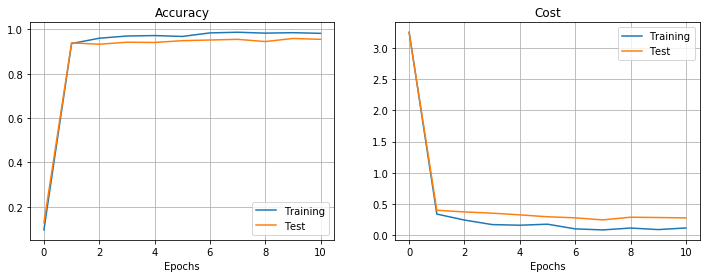

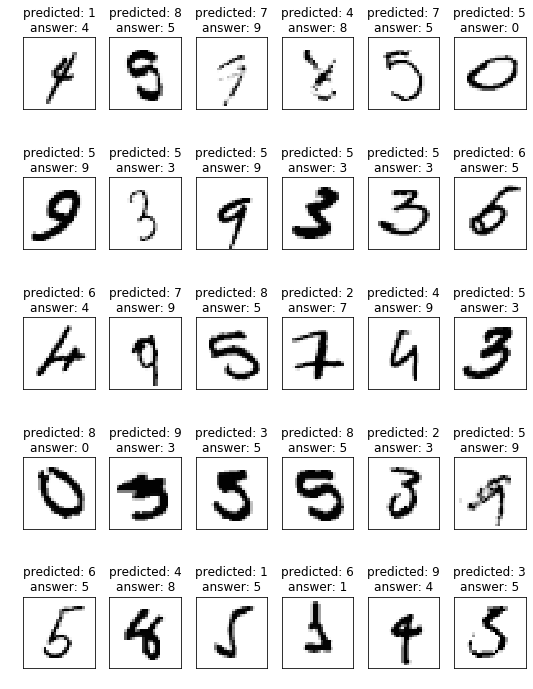

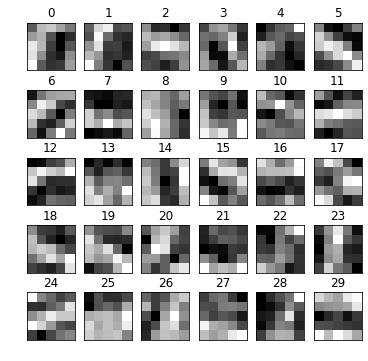

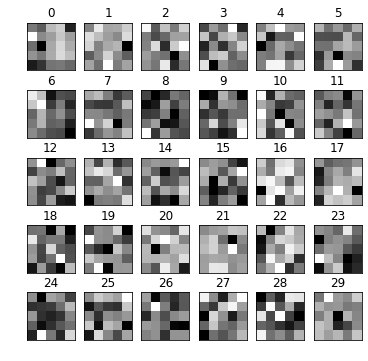

In [53]:
%matplotlib inline
import numpy
from matplotlib import pyplot as plt


def load_data(filename):
    data = []
    labels = []
    with open(filename) as f:
        lines = f.readlines()
        h, w = lines[0].split(',')
        h, w = int(h), int(w)
        for l in lines[1:]:
            arr = l.split(',')
            labels.append(arr[0])
            data.append([float(v) for v in arr[1:]])
        data = np.array(data).reshape(-1, 1, h, w)
        labels = np.array(labels)
    return data, labels

data_train, labels_train = load_data('../data/mnist/mnist_train')
data_test, labels_test = load_data('../data/mnist/mnist_test')

# 時間がかかる場合はこちらの小さい方のデータを使う
N_train = 5000
N_test = 1000
ids = np.random.choice(range(len(data_train)), N_train, replace=False)
data_train_s, labels_train_s = data_train[ids], labels_train[ids]
ids = np.random.choice(range(len(data_test)), N_test, replace=False)
data_test_s, labels_test_s = data_test[ids], labels_test[ids]

# モデルを学習
cnn = CNNClassifier(FN=30, FH=5, FW=5, PH=2, PW=2, h_units=100, h_layers=1, conv_layers=1, epochs=10, eta=1e-2, n_batch=128, l2=1e-3,
                    stride_filter=1, pad_filter=0, stride_pool=2, pad_pool=0)
#cnn.fit(data_train, labels_train, data_test, labels_test)  # データを全て使うと1エポックに1分強
cnn.fit(data_train_s, labels_train_s, data_test_s, labels_test_s)
"""
[2020/08/14 08:11:32] epoch 1 finished (acc=0.939, cost=0.3972487695003274)
[2020/08/14 08:11:42] epoch 2 finished (acc=0.933, cost=0.370503209174384)
[2020/08/14 08:11:53] epoch 3 finished (acc=0.942, cost=0.3509320513868158)
[2020/08/14 08:12:04] epoch 4 finished (acc=0.941, cost=0.32350270505143136)
[2020/08/14 08:12:15] epoch 5 finished (acc=0.949, cost=0.29289316614988753)
[2020/08/14 08:12:27] epoch 6 finished (acc=0.952, cost=0.2757685627240149)
[2020/08/14 08:12:38] epoch 7 finished (acc=0.955, cost=0.2427705701826003)
[2020/08/14 08:12:49] epoch 8 finished (acc=0.945, cost=0.2858131474431229)
[2020/08/14 08:13:00] epoch 9 finished (acc=0.959, cost=0.2808113788280283)
[2020/08/14 08:13:12] epoch 10 finished (acc=0.955, cost=0.2747987857080564)
"""

def plot_acc_cost(model):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.xlabel('Epochs')
    plt.title('Accuracy')
    plt.plot(range(len(model.acc_train)), model.acc_train, label='Training')
    plt.plot(range(len(model.acc_test)), model.acc_test, label='Test')
    plt.grid()
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.xlabel('Epochs')
    plt.title('Cost')
    plt.plot(range(len(model.cost_train)), model.cost_train, label='Training')
    plt.plot(range(len(model.cost_test)), model.cost_test, label='Test')
    plt.grid()
    plt.legend()
    plt.show()

def draw_cnn_filter(model):
    plt.figure(figsize=(6, 6))
    for i in range(model.FN):
        plt.subplot(model.FN//6, 6, i+1)
        plt.title(i)
        plt.xticks(color="None")
        plt.yticks(color="None")
        plt.tick_params(length=0)
        plt.imshow(model.layers[0].filters[i][0], cmap='binary')
    plt.show()

def draw_false_images(model, data_, labels_):
    num_max = 30
    
    labels_pred = model.predict(data_test_s)
    ids_test_false = labels_pred != labels_
    data_test_false = data_[ids_test_false]
    labels_test_false = labels_[ids_test_false]
    labels_pred_false = labels_pred[ids_test_false]

    imgs_draw = data_test_false[:num_max].reshape(-1, data_.shape[2], data_.shape[3])
    plt.figure(figsize=(9, 3*((len(imgs_draw)-1)//6+1)))
    for i in range(len(imgs_draw)):
        plt.subplot(len(imgs_draw)//6+1, 6, i+1)
        plt.title('predicted: {}\nanswer: {}'.format(labels_pred_false[i], labels_test_false[i]))
        plt.xticks(color="None")
        plt.yticks(color="None")
        plt.tick_params(length=0)
        plt.imshow(imgs_draw[i], cmap='Greys')
    plt.show()

# Accuracy / Cost の変化を描画
plot_acc_cost(cnn)

# 誤分類した画像を描画
draw_false_images(cnn, data_test_s, labels_test_s)

# 学習後のフィルタを描画
draw_cnn_filter(cnn)

# 学習前のフィルタを描画
cnn = CNNClassifier(FN=30, FH=5, FW=5, PH=2, PW=2, h_units=100, h_layers=1, conv_layers=1, epochs=0, eta=1e-1, n_batch=128, l2=1e-3,
                    stride_filter=1, pad_filter=0, stride_pool=2, pad_pool=0)
cnn.fit(data_train_s, labels_train_s, data_test_s, labels_test_s)
draw_cnn_filter(cnn)

[2020/08/14 08:15:09] epoch 1 finished (acc=0.942, cost=0.3367215868182966)
[2020/08/14 08:16:34] epoch 2 finished (acc=0.963, cost=0.23914443182064382)
[2020/08/14 08:18:00] epoch 3 finished (acc=0.951, cost=0.29005821714743807)
[2020/08/14 08:19:20] epoch 4 finished (acc=0.969, cost=0.19031223346767875)
[2020/08/14 08:20:43] epoch 5 finished (acc=0.976, cost=0.1497236312474963)
[2020/08/14 08:22:05] epoch 6 finished (acc=0.977, cost=0.14958681188873346)
[2020/08/14 08:23:28] epoch 7 finished (acc=0.972, cost=0.16262074677081703)
[2020/08/14 08:24:50] epoch 8 finished (acc=0.974, cost=0.14186812268621588)
[2020/08/14 08:26:14] epoch 9 finished (acc=0.973, cost=0.15257888146246473)
[2020/08/14 08:27:39] epoch 10 finished (acc=0.974, cost=0.15774631233914874)


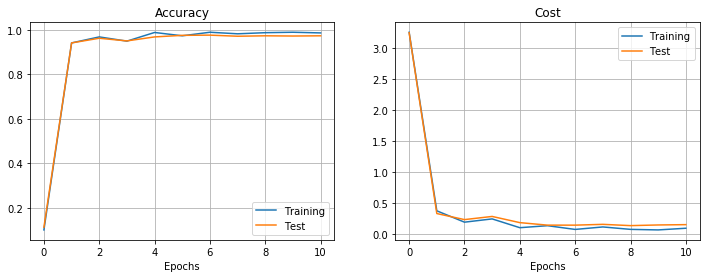

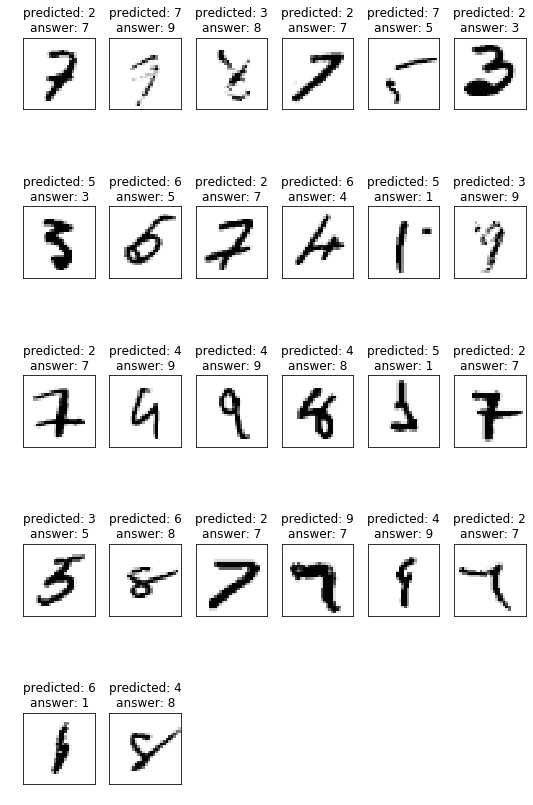

In [54]:
vgg = VGGLikeClassifier(FN=16, h_units=1024, h_layers=1, pool_layers=3, conv_layers_per_pool=3, epochs=10, eta=1e-3, n_batch=64, l2=2e-3,
                        dropout_ratio=0.3)
vgg.fit(data_train_s, labels_train_s, data_test_s, labels_test_s)
"""
[2020/08/14 07:12:33] epoch 1 finished (acc=0.947, cost=0.3422136046124626)
[2020/08/14 07:14:00] epoch 2 finished (acc=0.968, cost=0.1975593682755001)
[2020/08/14 07:15:25] epoch 3 finished (acc=0.981, cost=0.12028270657844949)
[2020/08/14 07:16:51] epoch 4 finished (acc=0.983, cost=0.11047091768282777)
[2020/08/14 07:18:25] epoch 5 finished (acc=0.983, cost=0.11939813095963324)
[2020/08/14 07:19:54] epoch 6 finished (acc=0.984, cost=0.11492061330224486)
[2020/08/14 07:21:26] epoch 7 finished (acc=0.982, cost=0.1299328725075713)
[2020/08/14 07:22:53] epoch 8 finished (acc=0.988, cost=0.0804802480653486)
[2020/08/14 07:24:21] epoch 9 finished (acc=0.982, cost=0.10280511190842885)
[2020/08/14 07:25:48] epoch 10 finished (acc=0.988, cost=0.07691392482951995)
"""

# Accuracy / Cost の変化を描画
plot_acc_cost(vgg)

# 誤分類した画像を描画
draw_false_images(vgg, data_test_s, labels_test_s)